In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("F:\\Fer-2013\\Fer-2013\\train\\0\\Training_3908.jpg")

In [3]:
img_array.shape


(48, 48, 3)

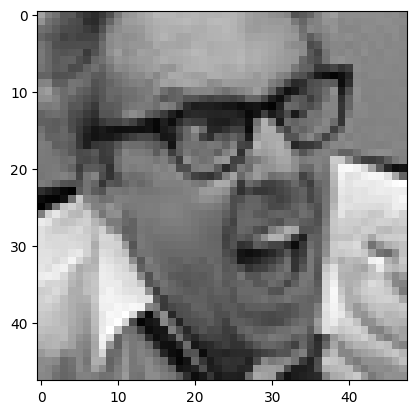

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="F:\\Fer-2013\\Fer-2013\\train" #training dataset

In [6]:
Classes=["0","1","2","3","4","5","6"]

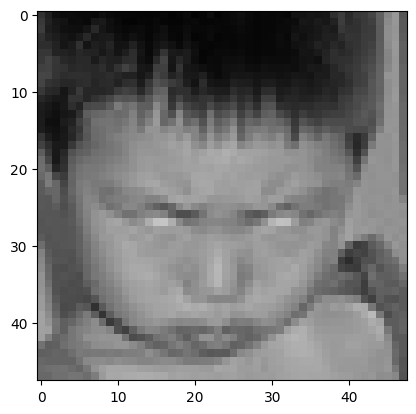

In [7]:
for category in  Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break      

<function matplotlib.pyplot.show(close=None, block=None)>

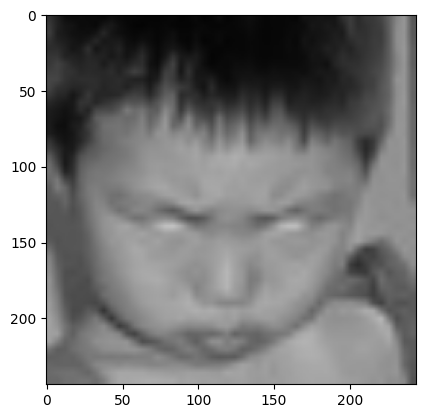

In [8]:
img_size=244
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [9]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        Class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,Class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

KeyboardInterrupt: 

In [11]:
print(len(training_Data))


28709


In [10]:
temp = np.array(training_Data)

C:\Users\Houcine\AppData\Local\Temp\ipykernel_11224\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [11]:
temp.shape

(28709, 2)

In [12]:
import random

random.shuffle(training_Data)

In [13]:
x=[] #Data
y=[] #label

for features,label in training_Data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,img_size,img_size,3)

In [14]:
x.shape

(28709, 244, 244, 3)

In [15]:
x[1]

array([[[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]]

In [16]:
y=np.array(y)
y.shape

(28709,)

In [18]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [28]:
    model = tf.keras.applications.MobileNetV2()

In [29]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
base_input = model.input

In [24]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [21]:
base_output=model.layers[-2].output

In [26]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [22]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [23]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [24]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [30]:
#new_model.summary()

In [25]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
midpoint = len(y) // 4
new_model.fit(x,y[:midpoint], epochs=25)

MemoryError: Unable to allocate 4.78 GiB for an array with shape (7177, 244, 244, 3) and data type float32

In [2]:
new_model=tf.keras.models.load_model('fmodel.h5')

In [3]:
frame=cv2.imread("images.jpeg")

In [7]:
frame.shape

(225, 225, 3)

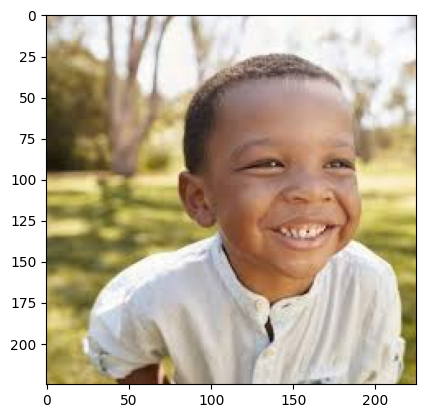

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [10]:
#face detection algo(gray image)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [11]:
 gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [12]:
gray.shape

(225, 225)

In [15]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("face not detected")
    else:
        for(ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

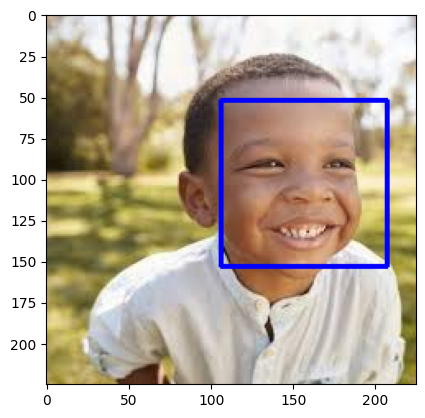

In [20]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

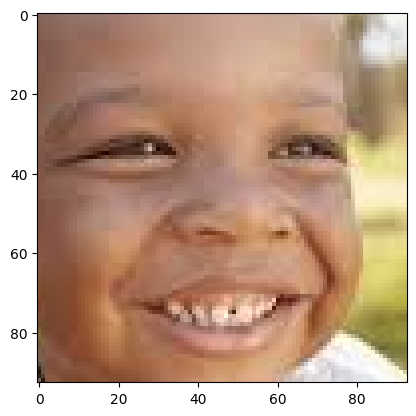

In [18]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [23]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0) #add forth dimension
final_image=final_image/255.0 #normalizing

In [4]:
Predictions=new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [5]:
Predictions

array([[0.23750417, 0.0038555 , 0.00698989, 0.09117406, 0.5873798 ,
        0.06370626, 0.00939039]], dtype=float32)

In [26]:
np.argmax(Predictions)

3

In [3]:
import cv2
import numpy as np

# Constants
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)

# Create a black image
img = np.zeros((500, 500))

# Set text and calculate text box size
text = "same text in a box"
(text_width, text_height), _ = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

# Draw text box and text
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)  # Try to open webcam 1
if not cap.isOpened():  # If webcam 1 is not available, try webcam 0
    cap = cv2.VideoCapture(0)
if not cap.isOpened():  # If no webcam is available, raise an error
    raise IOError("Cannot open webcam")

# Load face cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex: ex + ew]

    if 'face_roi' in locals():  # If face_roi is defined
        final_image = cv2.resize(face_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image / 255.0

        Predictions = new_model.predict(final_image)

        emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
        status = emotions[np.argmax(Predictions)]

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))

    cv2.imshow('Face Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 